# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("HRV.csv")
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [4]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

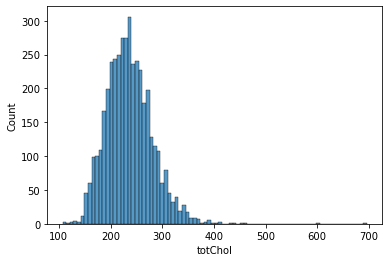

In [5]:
sns.histplot(dataset['totChol'])

In [6]:
totChol_median=dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median, inplace=True)
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

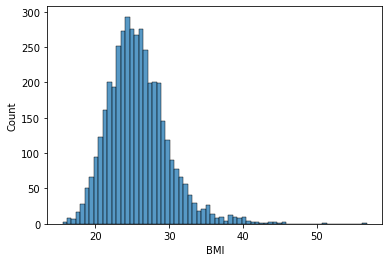

In [7]:
sns.histplot(dataset['BMI'])

In [8]:
BMI_median=dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median, inplace=True)
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

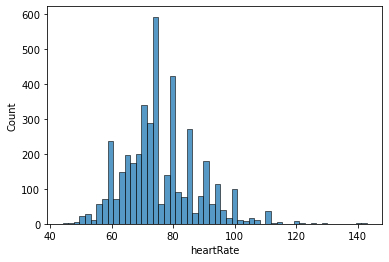

In [9]:
sns.histplot(dataset['heartRate'])

In [10]:
heartRate_median=dataset['heartRate'].median()
dataset['heartRate'].fillna(heartRate_median, inplace=True)
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='glucose', ylabel='Count'>

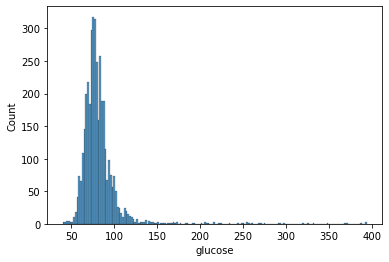

In [11]:
sns.histplot(dataset['glucose'])

In [12]:
glucose_median=dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace=True)
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [13]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
X=dataset.drop('TenYearCHD', axis=1)
y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.2,
                                                 random_state=20)

## Training the Logistic Regression model 

In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
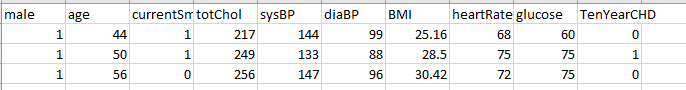

In [17]:
X_test.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [18]:
# Result 1
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [19]:
# Result 2
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

[0]


In [20]:
# Result 3
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Confusion matrix, Confusion matrix display and classification report

In [21]:
y_pred=classifier.predict(X_test.values)

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[714  10]
 [113  10]]


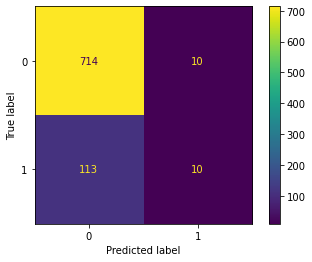

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
display.plot()
plt.show()

In [24]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.08      0.14       123

    accuracy                           0.85       847
   macro avg       0.68      0.53      0.53       847
weighted avg       0.81      0.85      0.81       847



### Discuss the results

##### Further explanation of the confusion matrix above is as follows:
- TN (True Negative) = Actual no 10 year risk of coronary heart disease (CHD) predicted no risk = 714 
- TP (True Positive) = Actual 10 year risk of CHD predicted yes risk = 10
- FP (False Positive0 = Actual no 10 year risk of CHD predicted yes risk = 10
- FN (False Negative) = Actual 10 year risk of CHD predicted no risk = 113

##### Precision is 0.86 or 86% in the training set and 0.5 or 50% in the test set, which represents the percentage of correct positive predictions relative to total positive predictions.
##### Recall is the percentage of correct positive predictions relative to total actual positives which is 99% or 0.99 in the training set or 0.08 in the test set.
##### The F-1 score is 0.92 or 92% in the training set and 0.14 or 14% in the test set. The F-1 score is a weighted mean of precision and recall. 

### Summary

##### Collectively, there is a decently strong percentage of true negatives from the dataset. The 714 true negatives help to aid in the accuracy of the model. The accuracy score is equal to 0.68 or 68%. While 68% is not typically a strong accuracy, the weighted average for accuracy is 0.81 or 81% which lends to the model being fairly accurate in its predictions. 